In [76]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [77]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [78]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


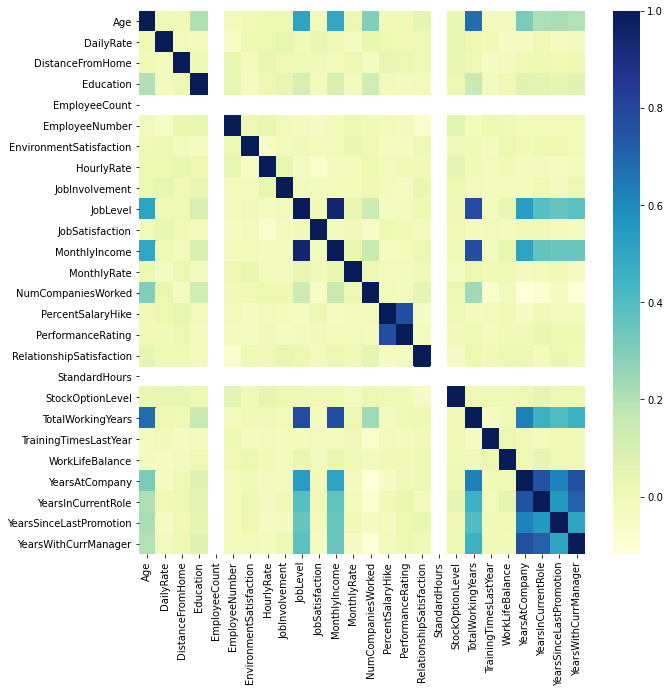

In [79]:
corr = data.drop(['Attrition'], axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='YlGnBu')
plt.show()

In [80]:
data['Attrition'] = data['Attrition'].apply(lambda row: 1 if row=='Yes' else 0)
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [81]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [83]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [84]:
def groupDistanceFromHome(data):
    if int(data) >=1 and int(data) <= 5:
        return 'NearBy'
    elif int(data) >=6 and int(data) <= 15:
        return 'MidDistance'
    else:
        return 'Far'

def groupYearsInCurrentRole(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'
    
def groupYearsWithCurrManager(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'

def groupYearsSinceLastPromotion(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'

def groupYearsAtCompany(data):
    if int(data) >=0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'
    
def groupTotalWorkingYears(data):
    if int(data) >=0 and int(data) <= 8:
        return 'short'
    elif int(data) >8 and int(data) <= 15:
        return 'medium'
    else:
        return 'long'

def groupPercentSalaryHike_by_rating(data):
    if int(data) == 3:
        return 'good'
    elif int(data) == 4:
        return 'better'
    else:
        return 'best'

def groupAverageWorkingYearInEachComp(data):
    if int(data) >= 0 and int(data) <= 3:
        return 'short'
    elif int(data) >3 and int(data) <= 8:
        return 'medium'
    else:
        return 'long'

def getAvgWorkingYearInEachComp(TotalWorkingYears, NumCompaniesWorked):
    if NumCompaniesWorked == 0:
        return TotalWorkingYears
    else:
        return TotalWorkingYears / NumCompaniesWorked

In [85]:
data['AverageWorkingYearInEachComp'] = data[['TotalWorkingYears', 'NumCompaniesWorked']].apply(lambda row: 
                                        getAvgWorkingYearInEachComp(row.TotalWorkingYears, row.NumCompaniesWorked), axis=1)
data['AverageWorkingYearInEachComp'] = data['AverageWorkingYearInEachComp'].astype(int)
data['AverageWorkingYearInEachComp'] = data['AverageWorkingYearInEachComp'].apply(lambda row:
                                        groupAverageWorkingYearInEachComp(row))
data['DistanceFromHome'] = data['DistanceFromHome'].apply(lambda row: groupDistanceFromHome(row))
data['YearsInCurrentRole'] = data['YearsInCurrentRole'].apply(lambda row: groupYearsInCurrentRole(row))
data['YearsWithCurrManager'] = data['YearsWithCurrManager'].apply(lambda row: groupYearsWithCurrManager(row))
data['YearsSinceLastPromotion'] = data['YearsSinceLastPromotion'].apply(lambda row: groupYearsSinceLastPromotion(row))
data['YearsAtCompany'] = data['YearsAtCompany'].apply(lambda row: groupYearsAtCompany(row))
data['TotalWorkingYears'] = data['TotalWorkingYears'].apply(lambda row: groupTotalWorkingYears(row))

In [86]:
data['MontlyIncomeByAge'] = data['MonthlyIncome'] / data['Age']
data['MontlyIncomeByAge'] = data['MontlyIncomeByAge'].astype(int)

In [87]:
data = data.drop(['EmployeeNumber', 'EmployeeCount','StandardHours', 'Over18'], axis=1)

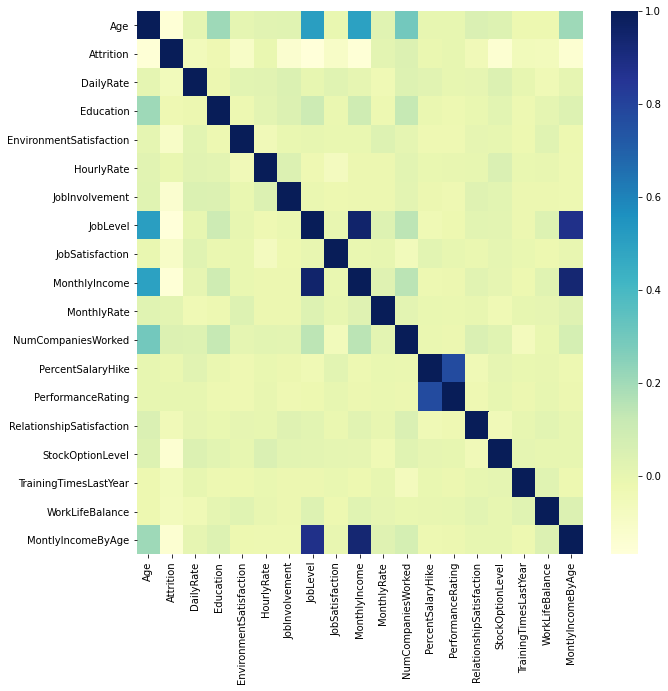

In [88]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='YlGnBu')
plt.show()

In [89]:
cat_columns =[]
for col, value in data.drop(['Attrition'], axis=1).iteritems():
    if value.dtype == 'object':
        cat_columns.append(col)
num_columns = data.drop(['Attrition'], axis=1).columns.difference(cat_columns)

In [90]:
print("categorical columns - %s" %(cat_columns))
print("")
print("numerical columns - %s" %(num_columns))

categorical columns - ['BusinessTravel', 'Department', 'DistanceFromHome', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AverageWorkingYearInEachComp']

numerical columns - Index(['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'MontlyIncomeByAge',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')


In [91]:
attrition_data = data['Attrition']
cat_data = data[cat_columns]
num_data = data[num_columns]

In [92]:
cat_data = pd.get_dummies(cat_data)

In [93]:
final_data = pd.concat([cat_data, num_data, attrition_data], axis=1)
final_data.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome_Far,DistanceFromHome_MidDistance,DistanceFromHome_NearBy,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,TotalWorkingYears_long,TotalWorkingYears_medium,TotalWorkingYears_short,YearsAtCompany_long,YearsAtCompany_medium,YearsAtCompany_short,YearsInCurrentRole_long,YearsInCurrentRole_medium,YearsInCurrentRole_short,YearsSinceLastPromotion_long,YearsSinceLastPromotion_medium,YearsSinceLastPromotion_short,YearsWithCurrManager_long,YearsWithCurrManager_medium,YearsWithCurrManager_short,AverageWorkingYearInEachComp_long,AverageWorkingYearInEachComp_medium,AverageWorkingYearInEachComp_short,Age,DailyRate,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,MontlyIncomeByAge,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition
0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,41,1102,2,2,94,3,2,4,5993,19479,146,8,11,3,1,0,0,1,1
1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,49,279,1,3,61,2,2,2,5130,24907,104,1,23,4,4,1,3,3,0
2,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,37,1373,2,4,92,2,1,3,2090,2396,56,6,15,3,2,0,3,3,1
3,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,33,1392,4,4,56,3,1,3,2909,23159,88,1,11,3,3,0,3,3,0
4,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,27,591,1,1,40,3,1,2,3468,16632,128,9,12,3,4,1,3,3,0


In [94]:
train_data, test_data = train_test_split(final_data, train_size=0.7, test_size=0.3)

In [95]:
y_train = train_data['Attrition']
X_train = train_data.drop(['Attrition'], axis=1)
y_test = test_data['Attrition']
X_test = test_data.drop(['Attrition'], axis=1)

In [96]:
scaler = MinMaxScaler()
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [97]:
corr_matrix = X_train_transformed.corr()
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.8:
            corr_features.add(corr_matrix.columns[i])
corr_features

{'Department_Sales',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Sales Executive',
 'MonthlyIncome',
 'MontlyIncomeByAge',
 'OverTime_Yes',
 'YearsSinceLastPromotion_short'}

In [98]:
# removing the columns for from the transformed data for which the value is greater than 0.8
X_train_transformed = X_train_transformed.drop(columns=list(corr_features), axis=1)

In [99]:
log_reg = LogisticRegression()
rfe = RFECV(log_reg, cv=StratifiedKFold(5), scoring='neg_mean_squared_error', min_features_to_select=5)
rfe.fit(X_train_transformed, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), min_features_to_select=5,
      scoring='neg_mean_squared_error')

In [100]:
X_train_transformed = X_train_transformed.drop(X_train_transformed.columns[np.where(rfe.support_ == False)], axis=1)

In [101]:
important_cols = pd.DataFrame()
important_cols['Cols'] = X_train_transformed.columns
important_cols['Percent'] = rfe.estimator_.coef_[0]

In [102]:
important_cols = important_cols.sort_values(by='Percent', ascending=False)
important_cols

,Cols,Percent
19,YearsSinceLastPromotion_long,1.296395
28,NumCompaniesWorked,1.101302
1,BusinessTravel_Travel_Frequently,0.928539
14,MaritalStatus_Single,0.868510
12,JobRole_Sales Representative,0.856124
20,YearsSinceLastPromotion_medium,0.842257
8,JobRole_Laboratory Technician,0.838643
16,TotalWorkingYears_short,0.709096
6,EducationField_Technical Degree,0.661885
5,EducationField_Marketing,0.526294


In [103]:
X_train_10_imp_feature = X_train_transformed[important_cols['Cols'].values[0:12]]

In [104]:
log_reg.fit(X_train_10_imp_feature, y_train)

LogisticRegression()

In [105]:
X_test_transform = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [106]:
X_test_transform_required_cols = X_test_transform[X_train_10_imp_feature.columns]

In [107]:
y_test_pred = log_reg.predict(X_test_transform_required_cols)

In [108]:
metrics.accuracy_score(y_test_pred, y_test)

0.8321995464852607